In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
                    
        # Coumn for dtypes
        dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns with missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [3]:
TS = pd.read_csv("countries-aggregated.csv")
TS.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [4]:
missing_values_table(TS)

Your selected dataframe has 5 columns.
There are 0 columns with missing values.


,Missing Values,% of Total Values,Data Types


In [5]:
TS.shape

(106665, 5)

In [6]:
TS.describe()

,Confirmed,Recovered,Deaths
count,1.066650e+05,1.066650e+05,106665.000000
mean,3.358771e+05,2.033220e+05,7996.735893
std,1.854821e+06,1.112992e+06,37080.374953
min,0.000000e+00,0.000000e+00,0.000000
25%,3.170000e+02,7.800000e+01,3.000000
50%,7.970000e+03,4.447000e+03,128.000000
75%,1.013820e+05,6.487600e+04,1848.000000
max,3.422681e+07,3.039069e+07,609862.000000


In [7]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106665 entries, 0 to 106664
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       106665 non-null  object
 1   Country    106665 non-null  object
 2   Confirmed  106665 non-null  int64 
 3   Recovered  106665 non-null  int64 
 4   Deaths     106665 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.1+ MB


In [8]:
# let's check the Country Name in line with this parameters:'Date','Confirmed','Recovered','Death'
def Country_Name(x):
    return TS[(TS['Country'] == x)][['Date','Confirmed','Recovered','Deaths']]
Nigeria=Country_Name("Nigeria")
Nigeria

,Date,Confirmed,Recovered,Deaths
70563,2020-01-22,0,0,0
70564,2020-01-23,0,0,0
70565,2020-01-24,0,0,0
70566,2020-01-25,0,0,0
70567,2020-01-26,0,0,0
...,...,...,...,...
71105,2021-07-17,169329,164672,2126
71106,2021-07-18,169532,164699,2127
71107,2021-07-19,169678,164720,2128
71108,2021-07-20,169884,164733,2128


In [9]:
Nigeria['Date'] = pd.to_datetime(Nigeria['Date'])
Nigeria.set_index('Date', inplace=True)
print(Nigeria)

            Confirmed  Recovered  Deaths
Date                                    
2020-01-22          0          0       0
2020-01-23          0          0       0
2020-01-24          0          0       0
2020-01-25          0          0       0
2020-01-26          0          0       0
...               ...        ...     ...
2021-07-17     169329     164672    2126
2021-07-18     169532     164699    2127
2021-07-19     169678     164720    2128
2021-07-20     169884     164733    2128
2021-07-21     169884     164733    2128

[547 rows x 3 columns]


In [10]:
Nigeria['Confirmed']

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2021-07-17    169329
2021-07-18    169532
2021-07-19    169678
2021-07-20    169884
2021-07-21    169884
Name: Confirmed, Length: 547, dtype: int64

## Visualizing the Nigerian data

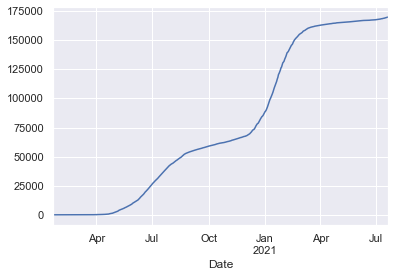

In [11]:
Confirmed = Nigeria['Confirmed']
Confirmed.plot()
plt.show()

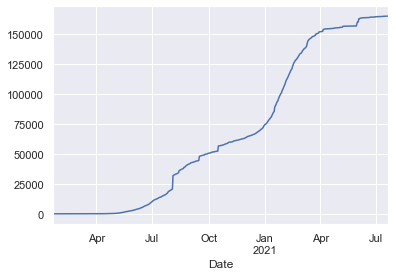

In [12]:
Recovered = Nigeria['Recovered']
Recovered.plot()
plt.show()

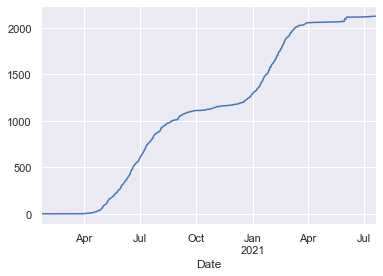

In [13]:
Deaths = Nigeria['Deaths']
Deaths.plot()
plt.show()

## Exploratory Data Analysis   
**Looking for outliers**

Text(0.5, 1.0, 'Box plot of Confirmed Cases')

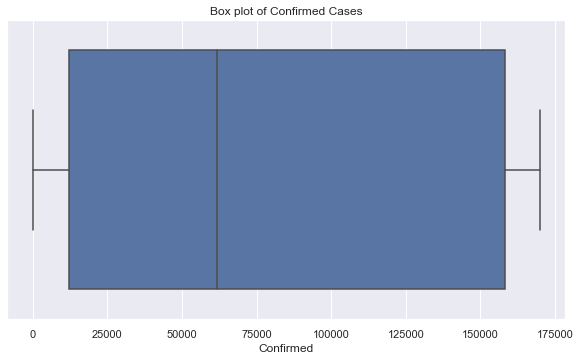

In [14]:
plt.figure(figsize=(10, 5.5))
g = sns.boxplot(Nigeria['Confirmed'])
g.set_title('Box plot of Confirmed Cases')

Text(0.5, 1.0, 'Box plot of Recovered Cases')

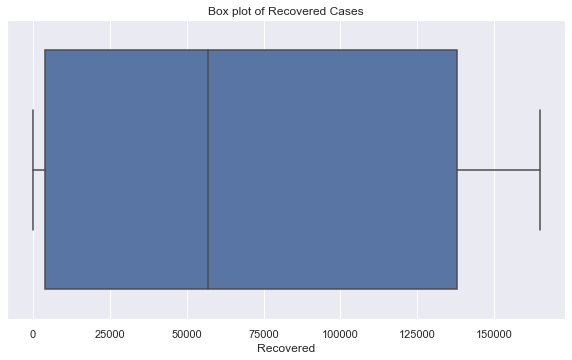

In [15]:
plt.figure(figsize=(10, 5.5))
g = sns.boxplot(Nigeria['Recovered'])
g.set_title('Box plot of Recovered Cases')

Text(0.5, 1.0, 'Box plot of Deaths Cases')

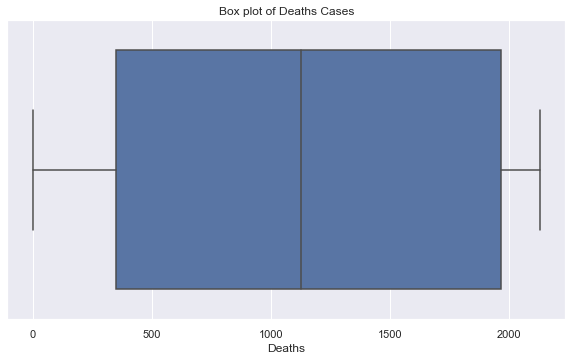

In [16]:
plt.figure(figsize=(10, 5.5))
g = sns.boxplot(Nigeria['Deaths'])
g.set_title('Box plot of Deaths Cases')

## Decomposing time series in trend, seasonality and residuals¶

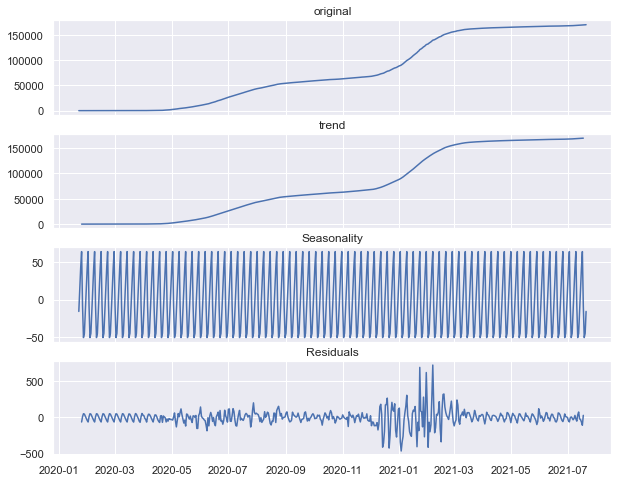

In [17]:
decomposition = seasonal_decompose(Nigeria['Confirmed'])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, axes = plt.subplots(4, 1,sharex=True,figsize=(10,8))
axes[0].plot(Nigeria['Confirmed'], label='Original')
axes[0].set_title('original')
axes[1].plot(trend,label='trend')
axes[1].set_title('trend')
axes[2].plot(seasonal,label='Seasonality')
axes[2].set_title('Seasonality')
axes[3].plot(residual, label='Residuals')
axes[3].set_title('Residuals')
plt.show()

## ARIMA MODELLING FOR CONFIRMED CASES
By using auto_arima which is a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(Nigeria['Confirmed'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7930.683, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14153.542, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.77 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7658.915, Time=1.39 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=13662.775, Time=0.40 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7935.115, Time=1.83 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=7580.595, Time=2.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=13645.307, Time=0.70 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=7389.357, Time=2.72 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=13644.383, Time=0.76 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=2.76 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=7357.233, Tim

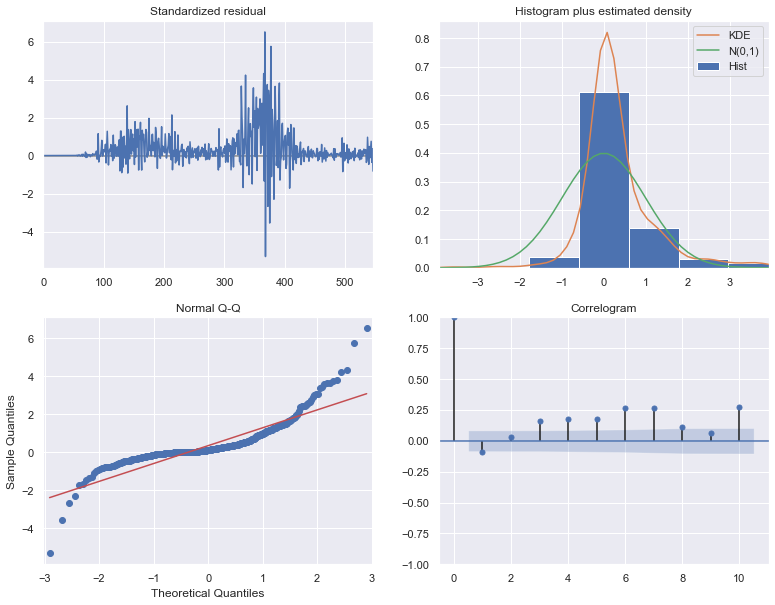

In [19]:
model.plot_diagnostics(figsize=(13,10))
plt.show()

## Forecasting for six months for Confirmed Cases

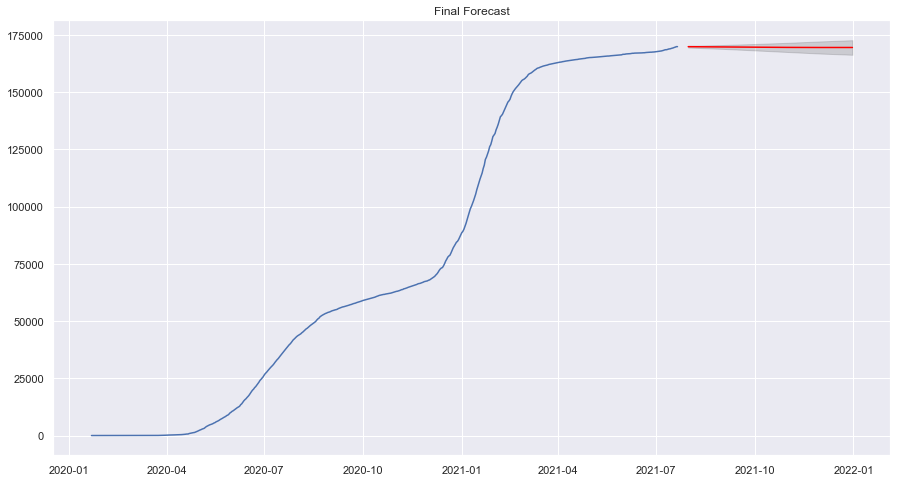

In [20]:
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(Nigeria['Confirmed'].index[-1], periods = n_periods, freq='M')

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize=(15, 8))
#fig2 = plt.figure(figsize=plt.figaspect(2.0))
plt.plot(Nigeria['Confirmed'])
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [21]:
# Figures
# 168256 is the actual figure in july
fc_series

2021-07-31    169864.041228
2021-08-31    169754.177989
2021-09-30    169649.091036
2021-10-31    169551.649122
2021-11-30    169513.854698
2021-12-31    169513.852333
Freq: M, dtype: float64

## ARIMA MODELLING FOR RECOVERED CASES

In [22]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

modelR = pm.auto_arima(Nigeria['Recovered'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(modelR.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8553.750, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8647.913, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8623.319, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8630.233, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8748.684, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8555.645, Time=2.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8555.638, Time=2.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8620.950, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8606.979, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8553.624, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8702.887, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8678.336, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8555.496, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

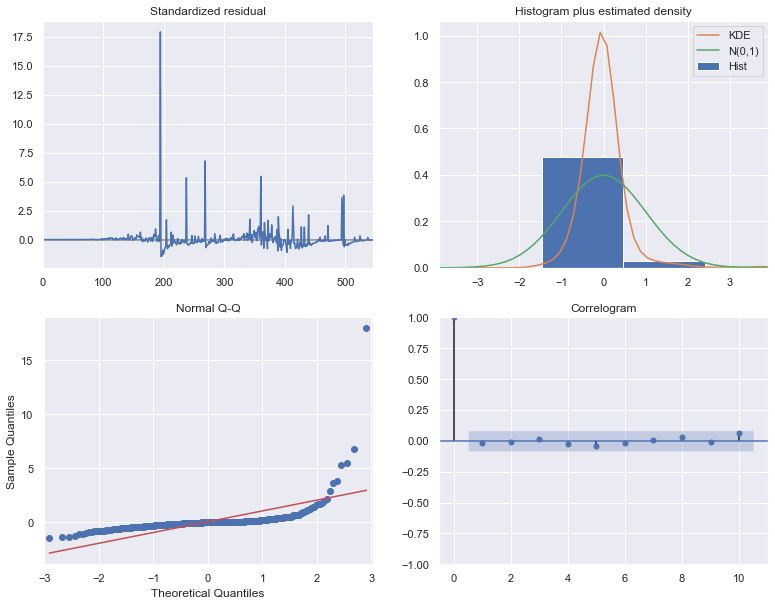

In [23]:
modelR.plot_diagnostics(figsize=(13,10))
plt.show()

## Forecasting for six months for Recovered Cases

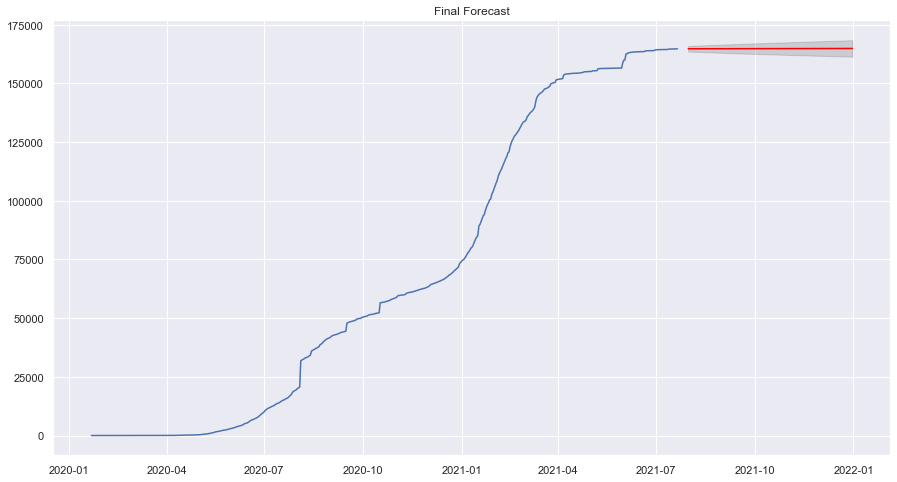

In [24]:
# Forecast
n_periods = 6
fc, confint = modelR.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(Nigeria['Recovered'].index[-1], periods = n_periods, freq='M')

# make series for plotting purpose
fc_seriesR = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize=(15, 8))
#fig2 = plt.figure(figsize=plt.figaspect(2.0))
plt.plot(Nigeria['Recovered'])
plt.plot(fc_seriesR, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [25]:
# From the Figure above
fc_seriesR

2021-07-31    164760.450601
2021-08-31    164787.653783
2021-09-30    164814.611775
2021-10-31    164841.326788
2021-11-30    164867.801011
2021-12-31    164894.036615
Freq: M, dtype: float64

## ARIMA MODELLING FOR DEATHS CASES

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

modelD = pm.auto_arima(Nigeria['Deaths'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(modelD.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3033.551, Time=0.48 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3358.418, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3185.465, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3033.841, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3356.418, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3035.435, Time=0.93 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3035.513, Time=1.34 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3033.513, Time=0.62 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3035.513, Time=0.83 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3037.241, Time=2.57 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3031.514, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3031.841, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3033.514, Time=0.65 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=3033.514, Time=0.39 sec
 ARIMA(1,2,1)(0,0,0)[0]          

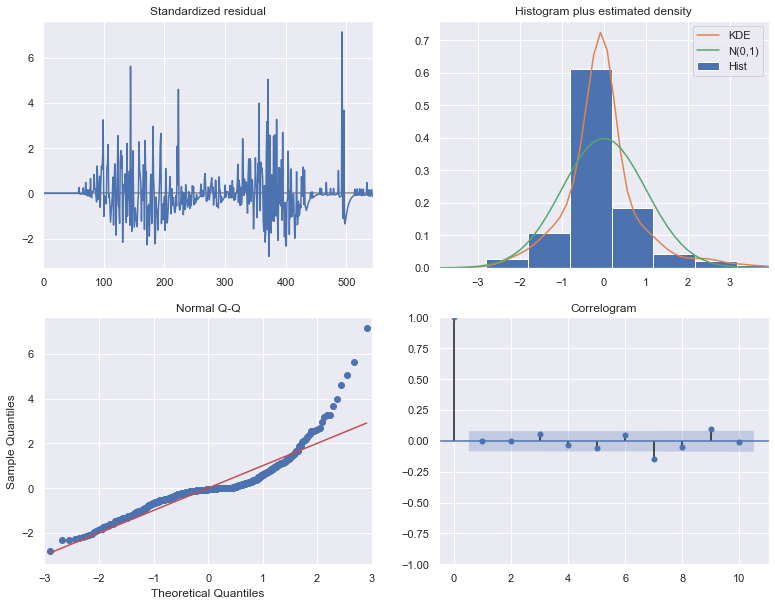

In [27]:
modelD.plot_diagnostics(figsize=(13,10))
plt.show()

## Forecasting for six months for Deaths Cases

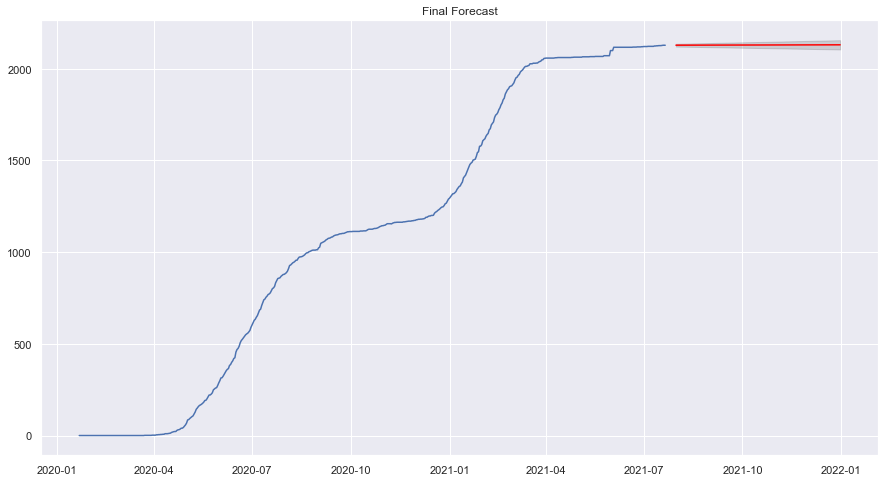

In [28]:
# Forecast
n_periods = 6
fc, confint = modelD.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(Nigeria['Deaths'].index[-1], periods = n_periods, freq='M')

# make series for plotting purpose
fc_seriesD = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig = plt.figure(figsize=(15, 8))
#fig2 = plt.figure(figsize=plt.figaspect(2.0))
plt.plot(Nigeria['Deaths'])
plt.plot(fc_seriesD, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

In [29]:
# From the Figure above
fc_seriesD

2021-07-31    2128.417636
2021-08-31    2128.803866
2021-09-30    2129.190095
2021-10-31    2129.576325
2021-11-30    2129.962554
2021-12-31    2130.348784
Freq: M, dtype: float64

## Conbined Forecast of the Six Month
We can form a dataframe of forecast by putting the forecast into series and concatenating the series by setting axis=1 in the concat function, we assure that the series are merged horizontally without encountering the ValueError.

In [30]:
ConfirmedForecast=fc_series
RecoveredForecast=fc_seriesR
DeathsForecast=fc_seriesD
seriesC = pd.Series(ConfirmedForecast, name='Forecast_Confirmed')
seriesR = pd.Series(RecoveredForecast, name='Forecast_Recovered')
seriesD = pd.Series(DeathsForecast, name='Forecast_Deaths')
merged_forecasts = pd.concat([seriesC, seriesR,seriesD], axis=1)
merged_forecasts

,Forecast_Confirmed,Forecast_Recovered,Forecast_Deaths
2021-07-31,169864.041228,164760.450601,2128.417636
2021-08-31,169754.177989,164787.653783,2128.803866
2021-09-30,169649.091036,164814.611775,2129.190095
2021-10-31,169551.649122,164841.326788,2129.576325
2021-11-30,169513.854698,164867.801011,2129.962554
2021-12-31,169513.852333,164894.036615,2130.348784
